In [ ]:
from google.colab import files
 
 
uploaded = files.upload()


Saving bestsellers with categories.csv to bestsellers with categories.csv


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("bestsellers with categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Subtask 1.2: Inspect the dataframe
Inspect the dataframe's columns, shapes, variable types, unique values etc.

In [ ]:
r,c = data.shape
print(f"The dataset has {r} rows and {c} columns.")

The dataset has 550 rows and 7 columns.


Check Datatype of Each Column


In [ ]:
data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

Detail Information about Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Check The Total Unique Values In Each Column

In [ ]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

Overview Of The Dataframe

In [ ]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Note: It is clear from the above table that maximum price of a book is 105$ and maximum rating is 4.9.

Task 2: Cleaning the Data

Subtask 2.1: Inspect Null values
Find out the number of Null values in all the columns and rows

Column-Wise Null Count

In [ ]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Row-Wise Null Count

In [ ]:
data.isnull().sum(axis=1).sort_values(ascending=False)

0      0
369    0
363    0
364    0
365    0
      ..
177    0
176    0
175    0
174    0
549    0
Length: 550, dtype: int64

Subtask 2.2: Check if the dataset has some duplicate values?

In [ ]:
data[data.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [ ]:
len(data[data.duplicated()])

0

In [ ]:
len(data.Name.unique())

351

Note: Total number of unique books are 351 but total rows are 550.
This is clear if we see the dataframe that some books are repeatedly among the top sellers in different years.

In [ ]:
data[['Name','Author']].duplicated().sum()

199

Task 3: Data Analysis
### Subtask 3.1: Find the Book with highest profit

Create a new column called Profit which contains the product of the two columns: Reviews and Price.
Sort the dataframe using the profit column as reference.
Extract the top ten profiting Books in descending order and store them in a new dataframe - top10

In [ ]:
data['Profit'] = data['Reviews'] * data['Price']
data

,Name,Author,User Rating,Reviews,Price,Year,Genre,Profit
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,138800
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,45144
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,284685
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,128544
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,91980
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,75304
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,114648
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,114648
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,114648


In [ ]:
Top10 = data.sort_values(by='Profit',ascending=False).head(10)
Top10

,Name,Author,User Rating,Reviews,Price,Year,Genre,Profit
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,1317615
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction,701295
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction,676880
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction,676880
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,672463
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463


Subtask 3.2: Drop duplicate values
After you found out the top 10 profiting books, you might have notice a duplicate value. So, it seems like the dataframe has duplicate values as well. Group the dataframe by name and repeat Subtask 3.1.

In [ ]:
Top10 = data.groupby('Name')[['Profit']].max().sort_values(by='Profit',ascending=False).head(10)
Top10

,Profit
Name,
The Girl on the Train,1430028
The Alchemist,1396161
Where the Crawdads Sing,1317615
"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",701295
Harry Potter Paperback Box Set (Books 1-7),700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction),676880
Becoming,672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),661710
The Fault in Our Stars,656266


Text(0.5, 1.0, 'Earning by Books')

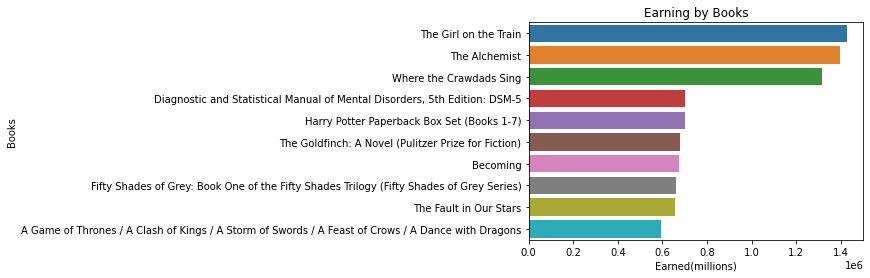

In [ ]:
sns.barplot(x=Top10.Profit,y=Top10.index.values)
plt.xlabel("Earned(millions)")
plt.ylabel("Books")
plt.title('Earning by Books')

sns.barplot(x=Top10.Profit,y=Top10.index.values)
plt.xlabel("Earned(millions)")
plt.ylabel("Books")
plt.title('Earning by Books')

In [ ]:
data.Genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [ ]:
data.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

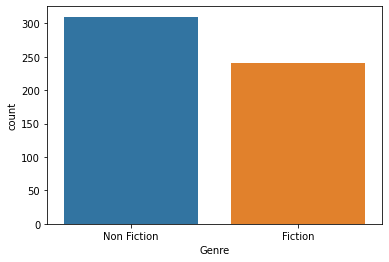

In [ ]:
sns.countplot(x="Genre", data=data)
plt.show()

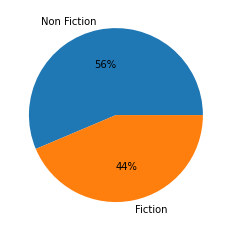

In [ ]:
plt.pie(data.Genre.value_counts(),labels=['Non Fiction','Fiction'],autopct='%.0f%%');

Non Fiction books are in majority in top selling category.

### Subtask 3.4: What is The Average Rating of Each Genre and Plot Histogtam of each Rating

In [ ]:
data.groupby('Genre')['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

Text(0.5, 0, 'Ratings')

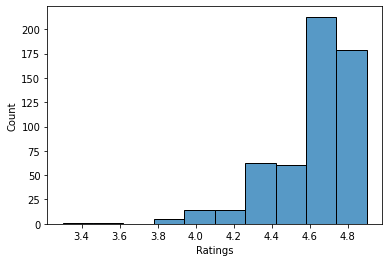

In [ ]:
sns.histplot(data=data['User Rating'],bins=10)
plt.xlabel("Ratings")

Subtask 3.5: Find the Relationship of Ratings with Time.

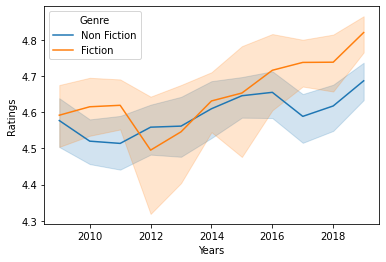

In [ ]:
sns.lineplot(y=data['User Rating'],x=data['Year'],hue=data['Genre']);
plt.ylabel("Ratings")
plt.xlabel("Years");

It is clear from the above graph that most of the books received ratings between 4.5 to 4.9.

### Subtask 3.6: Find Relationship Between Ratings and Price

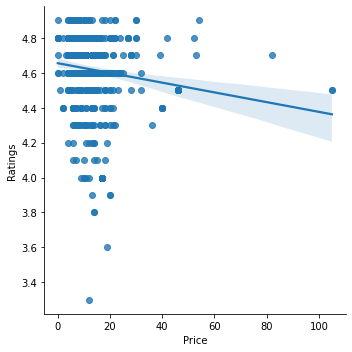

In [ ]:
sns.lmplot(y='User Rating',x='Price',data=data)
plt.ylabel('Ratings')
plt.xlabel('Price');

In [ ]:
data.groupby('Genre')['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

This graph shows that there is not a significant relationship between price and ratings but with increasing price , the ratings are falling for both Fiction and Non fiction.

### Subtask 3.6: Find How Much Books Have Earned Yearly.

In [ ]:
data.groupby('Year').Profit.sum().sort_values(ascending=False)

Year
2014    10625500
2012     8929419
2019     8336955
2013     8321579
2016     7951530
2015     7745165
2018     7183575
2017     6669195
2011     5548689
2010     3620509
2009     3567282
Name: Profit, dtype: int64

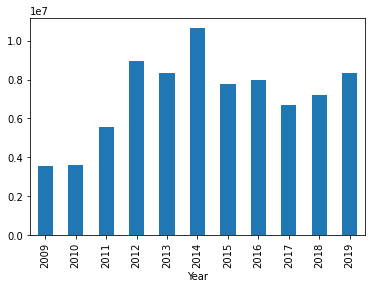

In [ ]:
data.groupby('Year').Profit.sum().plot(kind='bar')
plt.show()

In [ ]:
data.groupby(['Year','Genre']).Profit.sum().sort_values(ascending=False)

Year  Genre      
2014  Fiction        6858148
2013  Fiction        5444489
2012  Fiction        5098394
2018  Non Fiction    4713219
2019  Non Fiction    4500705
2015  Fiction        4364798
2016  Fiction        4064705
      Non Fiction    3886825
2019  Fiction        3836250
2012  Non Fiction    3831025
2014  Non Fiction    3767352
2017  Non Fiction    3568679
2015  Non Fiction    3380367
2017  Fiction        3100516
2011  Non Fiction    3082561
2013  Non Fiction    2877090
2018  Fiction        2470356
2011  Fiction        2466128
2009  Fiction        2058643
2010  Non Fiction    1930069
      Fiction        1690440
2009  Non Fiction    1508639
Name: Profit, dtype: int64

Plot using Seaborn

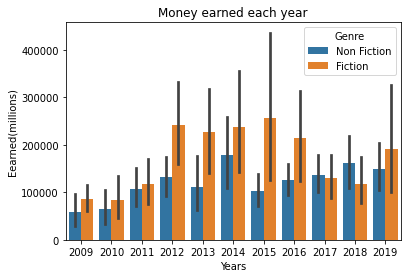

In [ ]:
sns.barplot(x=data['Year'],y=data['Profit'],hue=data['Genre'])
plt.xlabel('Years')
plt.ylabel("Eearned(millions)")
plt.title('Money earned each year');

In [ ]:
genre_average=data.groupby(['Genre'])['Profit'].mean()
genre_average

Genre
Fiction        172720.279167
Non Fiction    119504.938710
Name: Profit, dtype: float64

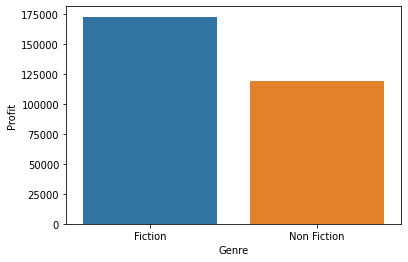

In [ ]:
sns.barplot(x=genre_average.index,y=genre_average);

Subtask 3.8:. Find Books Which Earned The Most Per Year (2009-19)

In [ ]:
data.groupby('Year')['Profit'].max()

Year
2009     394680
2010     474768
2011     508470
2012     661710
2013     701295
2014    1396161
2015    1430028
2016     700492
2017     458730
2018     672463
2019    1317615
Name: Profit, dtype: int64

In [ ]:
data.groupby('Year')['Profit'].transform(max)

0       700492
1       508470
2       672463
3       458730
4      1317615
        ...   
545    1317615
546     700492
547     458730
548     672463
549    1317615
Name: Profit, Length: 550, dtype: int64

In [ ]:
data[data.groupby('Year')['Profit'].transform(max) == data['Profit']]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Profit
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,661710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,458730
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,394680
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction,508470
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,474768


In [ ]:
most_earning_book_per_year=data[data.groupby('Year')['Profit'].transform(max) == data['Profit']]
most_earning_book_per_year

,Name,Author,User Rating,Reviews,Price,Year,Genre,Profit
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,661710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,458730
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,394680
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction,508470
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,474768


In [ ]:
most_earning_book_per_year=most_earning_book_per_year.sort_values('Year').set_index('Year')
most_earning_book_per_year

,Name,Author,User Rating,Reviews,Price,Genre,Profit
Year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730


Subtask 3.9: What is the Average Earning of Each Genre on per Year Basis

In [ ]:
genres_per_year_mean=data.groupby(['Year','Genre'])[['Profit']].mean().round(2)
genres_per_year_mean

Profit
Year Genre                 
2009 Fiction       85776.79
     Non Fiction   58024.58
2010 Fiction       84522.00
     Non Fiction   64335.63
2011 Fiction      117434.67
     Non Fiction  106295.21
2012 Fiction      242780.67
     Non Fiction  132104.31
2013 Fiction      226853.71
     Non Fiction  110657.31
2014 Fiction      236487.86
     Non Fiction  179397.71
2015 Fiction      256752.82
     Non Fiction  102435.36
2016 Fiction      213931.84
     Non Fiction  125381.45
2017 Fiction      129188.17
     Non Fiction  137256.88
2018 Fiction      117636.00
     Non Fiction  162524.79
2019 Fiction      191812.50
     Non Fiction  150023.50

In [ ]:
Earning_Graph=data.groupby('Year')['Profit'].sum()
Earning_Graph

Year
2009     3567282
2010     3620509
2011     5548689
2012     8929419
2013     8321579
2014    10625500
2015     7745165
2016     7951530
2017     6669195
2018     7183575
2019     8336955
Name: Profit, dtype: int64

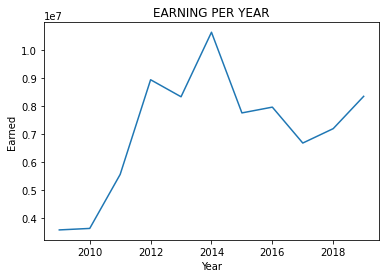

<Figure size 864x864 with 0 Axes>

In [ ]:
sns.lineplot(data=Earning_Graph)
plt.xlabel('Year')
plt.ylabel("Earned")
plt.title("EARNING PER YEAR")
plt.figure(figsize=(12,12));

Subtask 3.11: Top 10 authors which earned the most

In [ ]:
authors=data.groupby('Author')['Profit'].sum().sort_values(ascending=False).head(10)
authors

Author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
American Psychiatric Association      1402590
Name: Profit, dtype: int64

Text(0.5, 1.0, 'The Money Makers ')

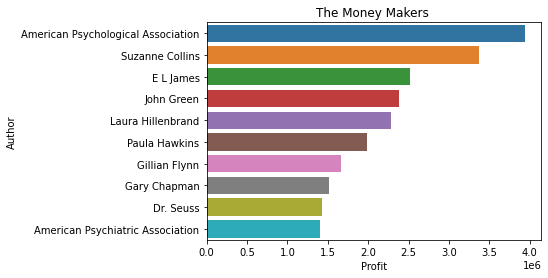

In [ ]:
sns.barplot(y=authors.index,x=authors)
plt.title('The Money Makers ')